In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Paris_Shared-Room.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0       id                           listing_url  \
0           385         385   518650   https://www.airbnb.com/rooms/518650   
1           445         445   566511   https://www.airbnb.com/rooms/566511   
2          1221        1221  1232867  https://www.airbnb.com/rooms/1232867   
3          1271        1271  1249964  https://www.airbnb.com/rooms/1249964   
4          1650        1650  1616064  https://www.airbnb.com/rooms/1616064   

  last_scraped                                        description  host_id  \
0   2024-09-12  As my guests usually say, my apartment is perf...  2552594   
1   2024-09-07  My apartment is located in the heart the area ...  2782865   
2   2024-09-13  Haven of peace.<br />Charming air-conditioned ...  6723343   
3   2024-09-13  You are looking for a private and whole apartm...  6811343   
4   2024-09-07  I am located right in the middle of Paris, 2 m...  3155873   

                                    host_url  host_since host_response_time  \
0  https://www.airbnb.com/users/show/2552594  2012-06-05     within an hour   
1  https://www.airbnb.com/users/show/2782865  2012-06-29     within an hour   
2  https://www.airbnb.com/users/show/6723343  2013-06-03     within an hour   
3  https://www.airbnb.com/users/show/6811343  2013-06-09     within an hour   
4  https://www.airbnb.com/users/show/3155873  2012-08-04     within an hour   

   ... review_scores_checkin review_scores_communication  \
0  ...                  4.93                        4.92   
1  ...                  4.85                        4.86   
2  ...                  4.95                        5.00   
3  ...                  4.96                        4.98   
4  ...                  4.81                        4.74   

  review_scores_location        license  instant_bookable  \
0                   4.81  7511100973643                 f   
1                   4.96  7510402838018                 f   
2                   5.00  7510402838018                 f   
3                   4.95  7510100699052                 f   
4                   4.92  7510401032828                 f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           0   
1                              1                                           0   
2                              1                                           0   
3                              1                                           0   
4                              2                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           1              1.54  
1                                           1              3.32  
2                                           1              6.56  
3                                           1              8.00  
4                                           1              0.40  

[5 rows x 52 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

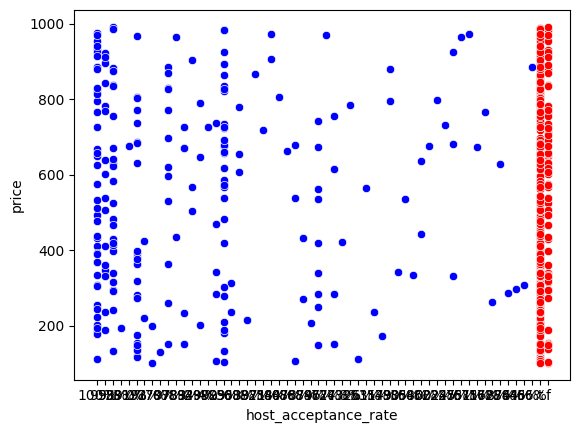

In [56]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [57]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
type(model)

sklearn.linear_model._base.LinearRegression

In [60]:
# Identificar columnas que contienen valores en formato de porcentaje
percentage_columns = [col for col in df.select_dtypes(include=['object']).columns 
                      if df[col].astype(str).str.contains('%').any()]

# Convertir valores de porcentaje a decimal
for col in percentage_columns:
    df[col] = df[col].str.replace('%', '', regex=True)  # Eliminar '%'
    df[col] = pd.to_numeric(df[col], errors='coerce') / 100  # Convertir a número en decimal

# Verificar que la conversión fue exitosa
print("Columnas convertidas a decimal:", percentage_columns)
print(df[percentage_columns].head())  # Muestra los primeros valores convertidos

Columnas convertidas a decimal: ['description', 'host_response_rate', 'host_acceptance_rate']
   description  host_response_rate  host_acceptance_rate
0          NaN                1.00                  1.00
1          NaN                0.67                  0.95
2          NaN                1.00                  1.00
3          NaN                1.00                  1.00
4          NaN                1.00                  0.98


In [61]:
# Reemplazar 'Entire home/apt' por el número 1 en todas las columnas donde aparezca
df = df.replace('Private Room', 3)

# Verificar si el reemplazo fue exitoso
print(df.head())

   Unnamed: 0.1  Unnamed: 0       id                           listing_url  \
0           385         385   518650   https://www.airbnb.com/rooms/518650   
1           445         445   566511   https://www.airbnb.com/rooms/566511   
2          1221        1221  1232867  https://www.airbnb.com/rooms/1232867   
3          1271        1271  1249964  https://www.airbnb.com/rooms/1249964   
4          1650        1650  1616064  https://www.airbnb.com/rooms/1616064   

  last_scraped  description  host_id  \
0   2024-09-12          NaN  2552594   
1   2024-09-07          NaN  2782865   
2   2024-09-13          NaN  6723343   
3   2024-09-13          NaN  6811343   
4   2024-09-07          NaN  3155873   

                                    host_url  host_since host_response_time  \
0  https://www.airbnb.com/users/show/2552594  2012-06-05     within an hour   
1  https://www.airbnb.com/users/show/2782865  2012-06-29     within an hour   
2  https://www.airbnb.com/users/show/6723343  2013-06

In [68]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente
df = df.fillna(0)  # Reemplaza todos los NaN en el DataFrame por 0
print(df.isna().sum().sum())  # Debería imprimir 0 si ya no hay NaN



float64
0


In [69]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [70]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([494818.45008263]),
 'rank_': 1,
 'singular_': array([0.00089855]),
 'intercept_': np.float64(509.88043194381027)}

In [71]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0073805142892449105

In [72]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([559.36227695, 556.8881847 , 559.36227695, 559.36227695,
       558.37264005, 526.2094408 , 509.88043194, 509.88043194,
       509.88043194, 509.88043194, 554.9089109 , 509.88043194,
       509.88043194, 509.88043194, 509.88043194, 509.88043194,
       509.88043194, 555.8985478 , 509.88043194, 509.88043194,
       547.9814526 , 509.88043194, 509.88043194, 509.88043194,
       509.88043194, 544.51772345, 509.88043194, 509.88043194,
       509.88043194, 509.88043194, 557.8778216 , 509.88043194,
       509.88043194, 509.88043194, 559.36227695, 509.88043194,
       548.47627105, 509.88043194, 509.88043194, 509.88043194,
       509.88043194, 509.88043194, 509.88043194, 550.9503633 ,
       556.39336625, 559.36227695, 509.88043194, 509.88043194,
       509.88043194, 509.88043194, 509.88043194, 509.88043194,
       509.88043194, 509.88043194, 509.88043194, 509.88043194,
       509.88043194, 509.88043194, 524.230167  , 509.88043194,
       509.88043194, 509.88043194, 509.88043194, 509.88

In [73]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0                   id  \
0      559.362277           385         385               518650   
1      556.888185           445         445               566511   
2      559.362277          1221        1221              1232867   
3      559.362277          1271        1271              1249964   
4      558.372640          1650        1650              1616064   
..            ...           ...         ...                  ...   
381    509.880432         94535       94535  1217525768784990609   
382    532.642081         94704       94704  1221134262102876592   
383    537.590265         95085       95085  1225408945235490107   
384    509.880432         95087       95087  1225437183537469404   
385    556.888185         95458       95458  1238755949783144791   

                                          listing_url last_scraped  \
0                 https://www.airbnb.com/rooms/518650   2024-09-12   
1                 https://www.airbnb.com/rooms/566511   2024-09-07   
2                https://www.airbnb.com/rooms/1232867   2024-09-13   
3                https://www.airbnb.com/rooms/1249964   2024-09-13   
4                https://www.airbnb.com/rooms/1616064   2024-09-07   
..                                                ...          ...   
381  https://www.airbnb.com/rooms/1217525768784990609   2024-09-13   
382  https://www.airbnb.com/rooms/1221134262102876592   2024-09-11   
383  https://www.airbnb.com/rooms/1225408945235490107   2024-09-13   
384  https://www.airbnb.com/rooms/1225437183537469404   2024-09-07   
385  https://www.airbnb.com/rooms/1238755949783144791   2024-09-07   

     description    host_id                                     host_url  \
0            0.0    2552594    https://www.airbnb.com/users/show/2552594   
1            0.0    2782865    https://www.airbnb.com/users/show/2782865   
2            0.0    6723343    https://www.airbnb.com/users/show/6723343   
3            0.0    6811343    https://www.airbnb.com/users/show/6811343   
4            0.0    3155873    https://www.airbnb.com/users/show/3155873   
..           ...        ...                                          ...   
381          0.0  594438927  https://www.airbnb.com/users/show/594438927   
382          0.0  561820941  https://www.airbnb.com/users/show/561820941   
383          0.0  463113034  https://www.airbnb.com/users/show/463113034   
384          0.0  540542859  https://www.airbnb.com/users/show/540542859   
385          0.0  264290202  https://www.airbnb.com/users/show/264290202   

     host_since  ... review_scores_checkin  review_scores_communication  \
0    2012-06-05  ...                  4.93                         4.92   
1    2012-06-29  ...                  4.85                         4.86   
2    2013-06-03  ...                  4.95                         5.00   
3    2013-06-09  ...                  4.96                         4.98   
4    2012-08-04  ...                  4.81                         4.74   
..          ...  ...                   ...                          ...   
381  2024-08-05  ...                  4.80                         4.83   
382  2024-02-13  ...                  4.80                         4.83   
383  2022-06-07  ...                  4.80                         4.83   
384  2023-10-05  ...                  4.80                         4.83   
385  2019-05-26  ...                  4.80                         4.83   

     review_scores_location        license  instant_bookable  \
0                      4.81  7511100973643                 f   
1                      4.96  7510402838018                 f   
2                      5.00  7510402838018                 f   
3                      4.95  7510100699052                 f   
4                      4.92  7510401032828                 f   
..                      ...            ...               ...   
381                    4.81  7510402838018                 f   
382                  

In [74]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [75]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0073805142892449105

In [76]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.08590991962075689)

In [77]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_28008\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [78]:
df['room_type'] = 3

In [79]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

In [80]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [81]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000          -0.042319              0.085910   
host_is_superhost         -0.042319           1.000000             -0.284498   
host_acceptance_rate       0.085910          -0.284498              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.078173          -0.018555             -0.132849   
bathrooms                 -0.008495          -0.089430             -0.085921   
review_scores_cleanliness -0.066017          -0.203795             -0.142857   
host_identity_verified     0.050670           0.156559             -0.016088   
instant_bookable          -0.085622          -0.111252             -0.326288   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.078173  -0.008495   
host_is_superhost                NaN     -0.018555  -0.089430   
host_acceptance_rate             NaN     -0.132849  -0.085921   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.159402   
bathrooms                        NaN      0.159402   1.000000   
review_scores_cleanliness        NaN      0.031015   0.020440   
host_identity_verified           NaN     -0.122603  -0.136124   
instant_bookable                 NaN      0.175283   0.120465   

                           review_scores_cleanliness  host_identity_verified  \
price                                      -0.066017                0.050670   
host_is_superhost                          -0.203795                0.156559   
host_acceptance_rate                       -0.142857               -0.016088   
room_type                                        NaN                     NaN   
accommodates                                0.031015               -0.122603   
bathrooms                                   0.020440               -0.136124   
review_scores_cleanliness                   1.000000               -0.233217   
host_identity_verified                     -0.233217                1.000000   
instant_bookable                            0.291618               -0.180395   

                           instant_bookable  
price                             -0.085622  
host_is_superhost                 -0.111252  
host_acceptance_rate              -0.326288  
room_type                               NaN  
accommodates                       0.175283  
bathrooms                          0.120465  
review_scores_cleanliness          0.291618  
host_identity_verified            -0.180395  
instant_bookable                   1.000000

In [82]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.042319              0.085910   
host_is_superhost          0.042319           1.000000              0.284498   
host_acceptance_rate       0.085910           0.284498              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.078173           0.018555              0.132849   
bathrooms                  0.008495           0.089430              0.085921   
review_scores_cleanliness  0.066017           0.203795              0.142857   
host_identity_verified     0.050670           0.156559              0.016088   
instant_bookable           0.085622           0.111252              0.326288   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.078173   0.008495   
host_is_superhost                NaN      0.018555   0.089430   
host_acceptance_rate             NaN      0.132849   0.085921   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.159402   
bathrooms                        NaN      0.159402   1.000000   
review_scores_cleanliness        NaN      0.031015   0.020440   
host_identity_verified           NaN      0.122603   0.136124   
instant_bookable                 NaN      0.175283   0.120465   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.066017                0.050670   
host_is_superhost                           0.203795                0.156559   
host_acceptance_rate                        0.142857                0.016088   
room_type                                        NaN                     NaN   
accommodates                                0.031015                0.122603   
bathrooms                                   0.020440                0.136124   
review_scores_cleanliness                   1.000000                0.233217   
host_identity_verified                      0.233217                1.000000   
instant_bookable                            0.291618                0.180395   

                           instant_bookable  
price                              0.085622  
host_is_superhost                  0.111252  
host_acceptance_rate               0.326288  
room_type                               NaN  
accommodates                       0.175283  
bathrooms                          0.120465  
review_scores_cleanliness          0.291618  
host_identity_verified             0.180395  
instant_bookable                   1.000000

In [83]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

<Axes: >

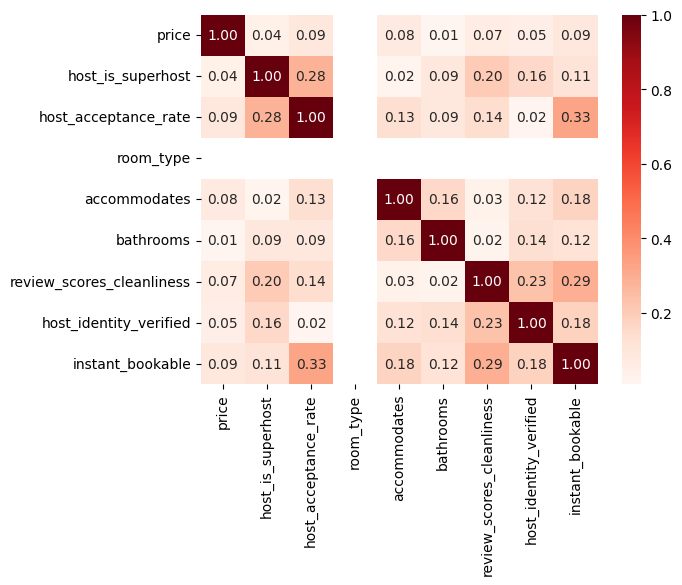

In [84]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price Vs Host is Superhost

In [85]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

In [86]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [88]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [89]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-36.18020148]),
 'rank_': 1,
 'singular_': array([6.0535178]),
 'intercept_': np.float64(602.2760551431603)}

In [90]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0017909049514237552

In [91]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([566.09585366, 529.91565217, 566.09585366, 566.09585366,
       566.09585366, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 566.09585366, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 566.09585366, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91565217,
       529.91565217, 529.91565217, 529.91565217, 529.91

In [92]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  room_type  \
0      566.095854  307.63                  1              0.000100          3   
1      529.915652  896.52                  2              0.000095          3   
2      566.095854  626.83                  1              0.000100          3   
3      566.095854  667.47                  1              0.000100          3   
4      566.095854  483.34                  1              0.000098          3   
..            ...     ...                ...                   ...        ...   
381    529.915652  261.42                  2              0.000000          3   
382    529.915652  307.82                  2              0.000046          3   
383    566.095854  885.08                  1              0.000056          3   
384    529.915652  292.40                  2              0.000000          3   
385    529.915652  639.11                  2              0.000095          3   

     accommodates  bathrooms  review_scores_cleanliness  \
0               2        1.0                       4.58   
1               1        1.0                       4.79   
2               3        1.0                       4.94   
3               2        1.0                       4.80   
4               4        1.0                       4.81   
..            ...        ...                        ...   
381             4        2.0                       4.65   
382             1        1.0                       4.65   
383             1        1.0                       4.65   
384             1        1.0                       4.65   
385             1        1.0                       4.65   

     host_identity_verified  instant_bookable  
0                         1                 2  
1                         1                 2  
2                         1                 2  
3                         1                 2  
4                         1                 2  
..                      ...               ...  
381                       1                 2  
382                       1                 2  
383                       1                 2  
384                       1                 2  
385                       1                 2  

[386 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

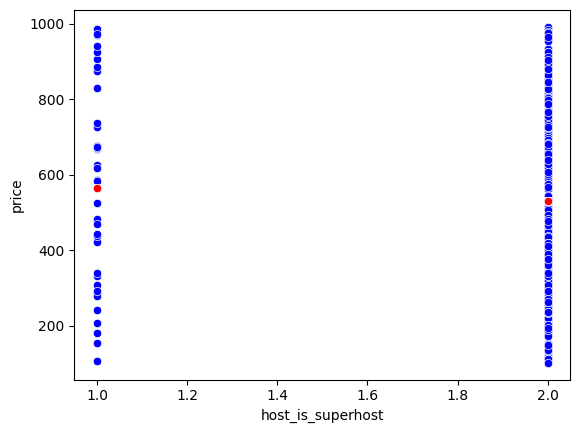

In [97]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [95]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0017909049514237552

In [96]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04231908495494385)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

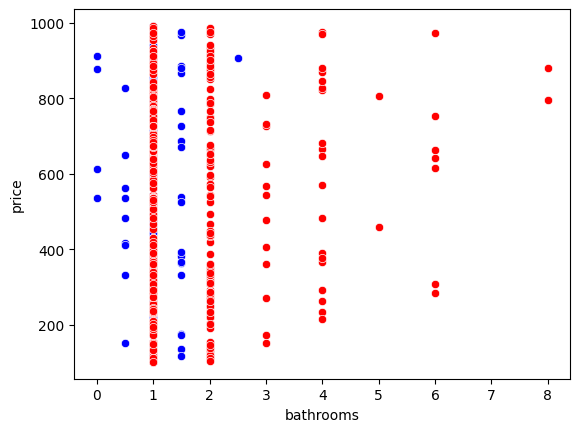

In [98]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [99]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [101]:
type(model)

sklearn.linear_model._base.LinearRegression

In [102]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [103]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-10.54767671]),
 'rank_': 1,
 'singular_': array([4.16809993]),
 'intercept_': np.float64(544.497582761706)}

In [104]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

7.216137372301201e-05

In [105]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 523.40222935, 523.40222935, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 539.22374441, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 544.49758276,
       533.94990605, 533.94990605, 533.94990605, 533.94990605,
       533.94990605, 533.94990605, 533.94990605, 533.94

In [106]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0       533.949906     566.095854    566.095854  307.63                  1   
1       533.949906     529.915652    529.915652  896.52                  2   
2       533.949906     566.095854    566.095854  626.83                  1   
3       533.949906     566.095854    566.095854  667.47                  1   
4       533.949906     566.095854    566.095854  483.34                  1   
..             ...            ...           ...     ...                ...   
381     523.402229     529.915652    529.915652  261.42                  2   
382     533.949906     529.915652    529.915652  307.82                  2   
383     533.949906     566.095854    566.095854  885.08                  1   
384     533.949906     529.915652    529.915652  292.40                  2   
385     533.949906     529.915652    529.915652  639.11                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0                0.000100          3             2        1.0   
1                0.000095          3             1        1.0   
2                0.000100          3             3        1.0   
3                0.000100          3             2        1.0   
4                0.000098          3             4        1.0   
..                    ...        ...           ...        ...   
381              0.000000          3             4        2.0   
382              0.000046          3             1        1.0   
383              0.000056          3             1        1.0   
384              0.000000          3             1        1.0   
385              0.000095          3             1        1.0   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         4.58                       1                 2  
1                         4.79                       1                 2  
2                         4.94                       1                 2  
3                         4.80                       1                 2  
4                         4.81                       1                 2  
..                         ...                     ...               ...  
381                       4.65                       1                 2  
382                       4.65                       1                 2  
383                       4.65                       1                 2  
384                       4.65                       1                 2  
385                       4.65                       1                 2  

[386 rows x 12 columns]

In [107]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones3',color='red',data = df)

<Axes: xlabel='bathrooms', ylabel='price'>

In [108]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

7.216137372301201e-05

In [109]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.008494785089866137)

Review_scores_cleanliness vs price

In [110]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

In [111]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [113]:
type(model)

sklearn.linear_model._base.LinearRegression

In [114]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [115]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-42.78274003]),
 'rank_': 1,
 'singular_': array([7.98597514]),
 'intercept_': np.float64(730.5570143724503)}

In [116]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.004358208739030922

In [117]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([534.61206502, 525.62768961, 519.21027861, 525.19986221,
       524.77203481, 519.63810601, 531.61727322, 531.61727322,
       531.61727322, 531.61727322, 518.35462381, 516.64331421,
       531.61727322, 548.30254183, 541.45730343, 531.61727322,
       529.05030882, 520.06593341, 531.61727322, 531.61727322,
       523.06072521, 531.61727322, 531.61727322, 531.61727322,
       516.64331421, 518.35462381, 531.61727322, 538.03468422,
       531.61727322, 531.61727322, 540.60164863, 519.63810601,
       570.12173925, 531.61727322, 531.61727322, 530.76161842,
       529.47813622, 531.61727322, 520.92158821, 516.64331421,
       530.76161842, 531.61727322, 531.61727322, 521.77724301,
       523.48855261, 545.30775003, 516.64331421, 516.64331421,
       516.64331421, 531.61727322, 516.64331421, 516.64331421,
       540.17382123, 531.61727322, 531.61727322, 535.89554722,
       534.18423762, 531.61727322, 520.92158821, 531.61727322,
       531.61727322, 531.61727322, 531.61727322, 559.42

In [118]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0       534.612065     533.949906     566.095854    566.095854  307.63   
1       525.627690     533.949906     529.915652    529.915652  896.52   
2       519.210279     533.949906     566.095854    566.095854  626.83   
3       525.199862     533.949906     566.095854    566.095854  667.47   
4       524.772035     533.949906     566.095854    566.095854  483.34   
..             ...            ...            ...           ...     ...   
381     531.617273     523.402229     529.915652    529.915652  261.42   
382     531.617273     533.949906     529.915652    529.915652  307.82   
383     531.617273     533.949906     566.095854    566.095854  885.08   
384     531.617273     533.949906     529.915652    529.915652  292.40   
385     531.617273     533.949906     529.915652    529.915652  639.11   

     host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                    1              0.000100          3             2   
1                    2              0.000095          3             1   
2                    1              0.000100          3             3   
3                    1              0.000100          3             2   
4                    1              0.000098          3             4   
..                 ...                   ...        ...           ...   
381                  2              0.000000          3             4   
382                  2              0.000046          3             1   
383                  1              0.000056          3             1   
384                  2              0.000000          3             1   
385                  2              0.000095          3             1   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0          1.0                       4.58                       1   
1          1.0                       4.79                       1   
2          1.0                       4.94                       1   
3          1.0                       4.80                       1   
4          1.0                       4.81                       1   
..         ...                        ...                     ...   
381        2.0                       4.65                       1   
382        1.0                       4.65                       1   
383        1.0                       4.65                       1   
384        1.0                       4.65                       1   
385        1.0                       4.65                       1   

     instant_bookable  
0                   2  
1                   2  
2                   2  
3                   2  
4                   2  
..                ...  
381                 2  
382                 2  
383                 2  
384                 2  
385                 2  

[386 rows x 13 columns]

In [119]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

In [120]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.004358208739030922

In [121]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.06601673075085529)

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

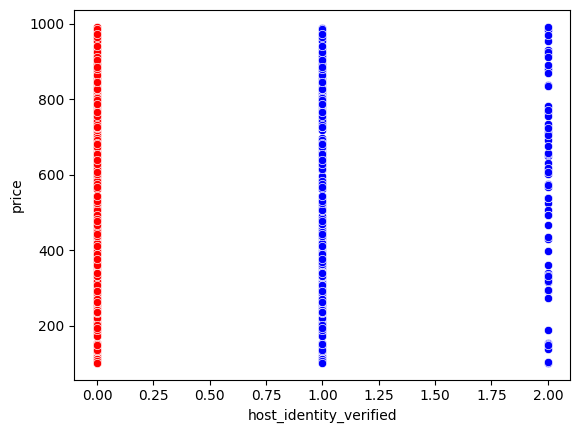

In [122]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [123]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [125]:
type(model)

sklearn.linear_model._base.LinearRegression

In [126]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [127]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([35.45206439]),
 'rank_': 1,
 'singular_': array([7.39696059]),
 'intercept_': np.float64(492.2448106060607)}

In [128]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0025674653787890467

In [129]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       527.696875  , 527.696875  , 527.696875  , 563.14893939,
       527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       527.696875  , 527.696875  , 527.696875  , 563.14893939,
       527.696875  , 563.14893939, 563.14893939, 527.696875  ,
       527.696875  , 527.696875  , 563.14893939, 527.696875  ,
       527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       563.14893939, 527.696875  , 527.696875  , 527.696875  ,
       527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       563.14893939, 527.696875  , 563.14893939, 527.696875  ,
       527.696875  , 563.14893939, 527.696875  , 563.14893939,
       527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       527.696875  , 527.696875  , 527.696875  , 527.696875  ,
       527.696875  , 563.14893939, 527.696875  , 527.696875  ,
       527.696875  , 563.14893939, 563.14893939, 527.69

In [131]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  Predicciones  \
0       527.696875     534.612065     533.949906     566.095854    566.095854   
1       527.696875     525.627690     533.949906     529.915652    529.915652   
2       527.696875     519.210279     533.949906     566.095854    566.095854   
3       527.696875     525.199862     533.949906     566.095854    566.095854   
4       527.696875     524.772035     533.949906     566.095854    566.095854   
..             ...            ...            ...            ...           ...   
381     527.696875     531.617273     523.402229     529.915652    529.915652   
382     527.696875     531.617273     533.949906     529.915652    529.915652   
383     527.696875     531.617273     533.949906     566.095854    566.095854   
384     527.696875     531.617273     533.949906     529.915652    529.915652   
385     527.696875     531.617273     533.949906     529.915652    529.915652   

      price  host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0    307.63                  1              0.000100          3             2   
1    896.52                  2              0.000095          3             1   
2    626.83                  1              0.000100          3             3   
3    667.47                  1              0.000100          3             2   
4    483.34                  1              0.000098          3             4   
..      ...                ...                   ...        ...           ...   
381  261.42                  2              0.000000          3             4   
382  307.82                  2              0.000046          3             1   
383  885.08                  1              0.000056          3             1   
384  292.40                  2              0.000000          3             1   
385  639.11                  2              0.000095          3             1   

     bathrooms  review_scores_cleanliness  host_identity_verified  \
0          1.0                       4.58                       1   
1          1.0                       4.79                       1   
2          1.0                       4.94                       1   
3          1.0                       4.80                       1   
4          1.0                       4.81                       1   
..         ...                        ...                     ...   
381        2.0                       4.65                       1   
382        1.0                       4.65                       1   
383        1.0                       4.65                       1   
384        1.0                       4.65                       1   
385        1.0                       4.65                       1   

     instant_bookable  
0                   2  
1                   2  
2                   2  
3                   2  
4                   2  
..                ...  
381                 2  
382                 2  
383                 2  
384                 2  
385                 2  

[386 rows x 14 columns]

In [132]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones5',color='red',data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

In [133]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0025674653787890467

In [134]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.050670162608669876)

price vs instant bookable

In [135]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [136]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [138]:
type(model)

sklearn.linear_model._base.LinearRegression

In [139]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [140]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-51.15206297]),
 'rank_': 1,
 'singular_': array([8.66294593]),
 'intercept_': np.float64(622.5458864954433)}

In [141]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.007331155681095214

In [142]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 571.39382353, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 571.39382353, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       571.39382353, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 571.39382353, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 571.39382353, 571.39382353,
       520.24176056, 520.24176056, 520.24176056, 520.24176056,
       520.24176056, 520.24176056, 520.24176056, 520.24

In [143]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones6', y_predic)
df

Predicciones6  Predicciones5  Predicciones4  Predicciones3  \
0       520.241761     527.696875     534.612065     533.949906   
1       520.241761     527.696875     525.627690     533.949906   
2       520.241761     527.696875     519.210279     533.949906   
3       520.241761     527.696875     525.199862     533.949906   
4       520.241761     527.696875     524.772035     533.949906   
..             ...            ...            ...            ...   
381     520.241761     527.696875     531.617273     523.402229   
382     520.241761     527.696875     531.617273     533.949906   
383     520.241761     527.696875     531.617273     533.949906   
384     520.241761     527.696875     531.617273     533.949906   
385     520.241761     527.696875     531.617273     533.949906   

     Predicciones2  Predicciones   price  host_is_superhost  \
0       566.095854    566.095854  307.63                  1   
1       529.915652    529.915652  896.52                  2   
2       566.095854    566.095854  626.83                  1   
3       566.095854    566.095854  667.47                  1   
4       566.095854    566.095854  483.34                  1   
..             ...           ...     ...                ...   
381     529.915652    529.915652  261.42                  2   
382     529.915652    529.915652  307.82                  2   
383     566.095854    566.095854  885.08                  1   
384     529.915652    529.915652  292.40                  2   
385     529.915652    529.915652  639.11                  2   

     host_acceptance_rate  room_type  accommodates  bathrooms  \
0                0.000100          3             2        1.0   
1                0.000095          3             1        1.0   
2                0.000100          3             3        1.0   
3                0.000100          3             2        1.0   
4                0.000098          3             4        1.0   
..                    ...        ...           ...        ...   
381              0.000000          3             4        2.0   
382              0.000046          3             1        1.0   
383              0.000056          3             1        1.0   
384              0.000000          3             1        1.0   
385              0.000095          3             1        1.0   

     review_scores_cleanliness  host_identity_verified  instant_bookable  
0                         4.58                       1                 2  
1                         4.79                       1                 2  
2                         4.94                       1                 2  
3                         4.80                       1                 2  
4                         4.81                       1                 2  
..                         ...                     ...               ...  
381                       4.65                       1                 2  
382                       4.65                       1                 2  
383                       4.65                       1                 2  
384                       4.65                       1                 2  
385                       4.65                       1                 2  

[386 rows x 15 columns]

In [144]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [145]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.007331155681095214

In [146]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.08562216816394697)